STEP 1

In [420]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

%matplotlib inline

In [421]:
printer = pd.read_csv('3DPrinter.csv')
printer

,3D PRINTER,PV,MPS,LT,NE,PU,MFP
0,MAKERBOT REPLICATOR MINI,74.53,80,200,1,1952.00,48.00
1,PRINTRBOT SIMPLE,216.00,80,100,1,974.67,30.00
2,ULTIMAKER 2,637.20,300,20,1,3406.67,42.00
3,XYZ DA VINCI 1.0,474.55,150,100,1,1032.00,46.65
4,MAKERBOT REPLICATOR 5.0,455.60,100,100,1,3864.00,48.00
5,ALFINIA H,125.00,30,150,1,1701.33,31.99
6,UP PLUS 2,160.33,30,150,1,2228.00,56.40
7,DITTO PRO,491.99,120,50,1,2570.67,44.99
8,AIRWOLF AW3D HD,1152.00,150,60,1,4021.33,48.00
9,FELIX 3.0,720.00,200,50,1,2708.00,32.60


In [422]:
names = printer['3D PRINTER']
printer.drop(columns = ['3D PRINTER'], inplace = True)
printer

,PV,MPS,LT,NE,PU,MFP
0,74.53,80,200,1,1952.00,48.00
1,216.00,80,100,1,974.67,30.00
2,637.20,300,20,1,3406.67,42.00
3,474.55,150,100,1,1032.00,46.65
4,455.60,100,100,1,3864.00,48.00
5,125.00,30,150,1,1701.33,31.99
6,160.33,30,150,1,2228.00,56.40
7,491.99,120,50,1,2570.67,44.99
8,1152.00,150,60,1,4021.33,48.00
9,720.00,200,50,1,2708.00,32.60


In [423]:
denom = np.sqrt(np.sum(printer**2))

printer = printer.div(denom, axis=1)

In [424]:
printer

,PV,MPS,LT,NE,PU,MFP
0,0.034490,0.167312,0.536635,0.258199,0.207558,0.278549
1,0.099957,0.167312,0.268317,0.258199,0.103637,0.174093
2,0.294873,0.627421,0.053663,0.258199,0.362234,0.243730
3,0.219605,0.313711,0.268317,0.258199,0.109733,0.270715
4,0.210835,0.209140,0.268317,0.258199,0.410862,0.278549
5,0.057846,0.062742,0.402476,0.258199,0.180904,0.185641
6,0.074195,0.062742,0.402476,0.258199,0.236905,0.327295
7,0.227675,0.250969,0.134159,0.258199,0.273341,0.261082
8,0.533104,0.313711,0.160990,0.258199,0.427591,0.278549
9,0.333190,0.418281,0.134159,0.258199,0.287944,0.189181


STEP 2

In [425]:
matrix = printer.copy()

crit_weights = np.array([0.128, 0.126, 0.133, 0.08, 0.326, 0.206])

matrix.loc[:,['PV', 'MPS', 'LT', 'NE', 'PU', 'MFP']] *= crit_weights

matrix

,PV,MPS,LT,NE,PU,MFP
0,0.004415,0.021081,0.071372,0.020656,0.067664,0.057381
1,0.012795,0.021081,0.035686,0.020656,0.033786,0.035863
2,0.037744,0.079055,0.007137,0.020656,0.118088,0.050208
3,0.028109,0.039528,0.035686,0.020656,0.035773,0.055767
4,0.026987,0.026352,0.035686,0.020656,0.133941,0.057381
5,0.007404,0.007906,0.053529,0.020656,0.058975,0.038242
6,0.009497,0.007906,0.053529,0.020656,0.077231,0.067423
7,0.029142,0.031622,0.017843,0.020656,0.089109,0.053783
8,0.068237,0.039528,0.021412,0.020656,0.139395,0.057381
9,0.042648,0.052703,0.017843,0.020656,0.093870,0.038971


STEP 3

Benefit types positive and negative ideal solutions:

In [426]:
v_plus_PV = matrix['PV'].max()
v_minus_PV = matrix['PV'].min()

In [427]:
v_plus_MPS = matrix['MPS'].max()
v_minus_MPS = matrix['MPS'].min()

In [428]:
v_plus_NE = matrix['NE'].max()
v_minus_NE = matrix['NE'].min()

Cost type positive and negative ideal solutions:

In [429]:
v_plus_LT = matrix['LT'].min()
v_minus_LT = matrix['LT'].max()

In [430]:
v_plus_PU = matrix['PU'].min()
v_minus_PU = matrix['PU'].max()

In [431]:
v_plus_MFP = matrix['MFP'].min()
v_minus_MFP = matrix['MFP'].max()

STEP 4

In [432]:
matrix['s_plus'] = np.sqrt((matrix['PV'] -v_plus_PV)**2
                + (matrix['MPS'] -v_plus_MPS)**2
                + (matrix['LT'] -v_plus_LT)**2
                + (matrix['NE'] -v_plus_NE)**2
                + (matrix['PU'] -v_plus_PU)**2
                + (matrix['MFP'] -v_plus_MFP)**2)

In [433]:
matrix['s_minus'] = np.sqrt((matrix['PV'] -v_minus_PV)**2
                + (matrix['MPS'] -v_minus_MPS)**2
                + (matrix['LT'] -v_minus_LT)**2
                + (matrix['NE'] -v_minus_NE)**2
                + (matrix['PU'] -v_minus_PU)**2
                + (matrix['MFP'] -v_minus_MFP)**2)

In [434]:
matrix

,PV,MPS,LT,NE,PU,MFP,s_plus,s_minus
0,0.004415,0.021081,0.071372,0.020656,0.067664,0.057381,0.116799,0.095686
1,0.012795,0.021081,0.035686,0.020656,0.033786,0.035863,0.087622,0.139979
2,0.037744,0.079055,0.007137,0.020656,0.118088,0.050208,0.093269,0.126390
3,0.028109,0.039528,0.035686,0.020656,0.035773,0.055767,0.069681,0.133246
4,0.026987,0.026352,0.035686,0.020656,0.133941,0.057381,0.127512,0.077663
5,0.007404,0.007906,0.053529,0.020656,0.058975,0.038242,0.109489,0.115010
6,0.009497,0.007906,0.053529,0.020656,0.077231,0.067423,0.118488,0.082569
7,0.029142,0.031622,0.017843,0.020656,0.089109,0.053783,0.087968,0.104593
8,0.068237,0.039528,0.021412,0.020656,0.139395,0.057381,0.117700,0.107480
9,0.042648,0.052703,0.017843,0.020656,0.093870,0.038971,0.074280,0.122789


STEP 5

In [435]:
matrix['s'] = matrix['s_minus'] / (matrix['s_plus'] + matrix['s_minus'])

In [436]:
matrix['names'] = pd.Series(names)
matrix

,PV,MPS,LT,NE,PU,MFP,s_plus,s_minus,s,names
0,0.004415,0.021081,0.071372,0.020656,0.067664,0.057381,0.116799,0.095686,0.450317,MAKERBOT REPLICATOR MINI
1,0.012795,0.021081,0.035686,0.020656,0.033786,0.035863,0.087622,0.139979,0.615020,PRINTRBOT SIMPLE
2,0.037744,0.079055,0.007137,0.020656,0.118088,0.050208,0.093269,0.126390,0.575393,ULTIMAKER 2
3,0.028109,0.039528,0.035686,0.020656,0.035773,0.055767,0.069681,0.133246,0.656618,XYZ DA VINCI 1.0
4,0.026987,0.026352,0.035686,0.020656,0.133941,0.057381,0.127512,0.077663,0.378520,MAKERBOT REPLICATOR 5.0
5,0.007404,0.007906,0.053529,0.020656,0.058975,0.038242,0.109489,0.115010,0.512298,ALFINIA H
6,0.009497,0.007906,0.053529,0.020656,0.077231,0.067423,0.118488,0.082569,0.410673,UP PLUS 2
7,0.029142,0.031622,0.017843,0.020656,0.089109,0.053783,0.087968,0.104593,0.543169,DITTO PRO
8,0.068237,0.039528,0.021412,0.020656,0.139395,0.057381,0.117700,0.107480,0.477307,AIRWOLF AW3D HD
9,0.042648,0.052703,0.017843,0.020656,0.093870,0.038971,0.074280,0.122789,0.623077,FELIX 3.0


In [437]:
matrix.sort_values(by=['s'], ascending= False, inplace=True)
matrix

,PV,MPS,LT,NE,PU,MFP,s_plus,s_minus,s,names
3,0.028109,0.039528,0.035686,0.020656,0.035773,0.055767,0.069681,0.133246,0.656618,XYZ DA VINCI 1.0
11,0.041582,0.031622,0.035686,0.041312,0.067802,0.034859,0.070232,0.126266,0.642581,MBOT GRID 2
9,0.042648,0.052703,0.017843,0.020656,0.093870,0.038971,0.074280,0.122789,0.623077,FELIX 3.0
1,0.012795,0.021081,0.035686,0.020656,0.033786,0.035863,0.087622,0.139979,0.615020,PRINTRBOT SIMPLE
2,0.037744,0.079055,0.007137,0.020656,0.118088,0.050208,0.093269,0.126390,0.575393,ULTIMAKER 2
7,0.029142,0.031622,0.017843,0.020656,0.089109,0.053783,0.087968,0.104593,0.543169,DITTO PRO
5,0.007404,0.007906,0.053529,0.020656,0.058975,0.038242,0.109489,0.115010,0.512298,ALFINIA H
8,0.068237,0.039528,0.021412,0.020656,0.139395,0.057381,0.117700,0.107480,0.477307,AIRWOLF AW3D HD
0,0.004415,0.021081,0.071372,0.020656,0.067664,0.057381,0.116799,0.095686,0.450317,MAKERBOT REPLICATOR MINI
6,0.009497,0.007906,0.053529,0.020656,0.077231,0.067423,0.118488,0.082569,0.410673,UP PLUS 2


In [438]:
final = pd.DataFrame()
final['3DPRINT'] = matrix['names']
final['s'] = matrix['s']
final.reset_index(inplace=True, drop=True)
final['Rank'] = pd.Series(list(range(1, 13)))
final

,3DPRINT,s,Rank
0,XYZ DA VINCI 1.0,0.656618,1
1,MBOT GRID 2,0.642581,2
2,FELIX 3.0,0.623077,3
3,PRINTRBOT SIMPLE,0.615020,4
4,ULTIMAKER 2,0.575393,5
5,DITTO PRO,0.543169,6
6,ALFINIA H,0.512298,7
7,AIRWOLF AW3D HD,0.477307,8
8,MAKERBOT REPLICATOR MINI,0.450317,9
9,UP PLUS 2,0.410673,10


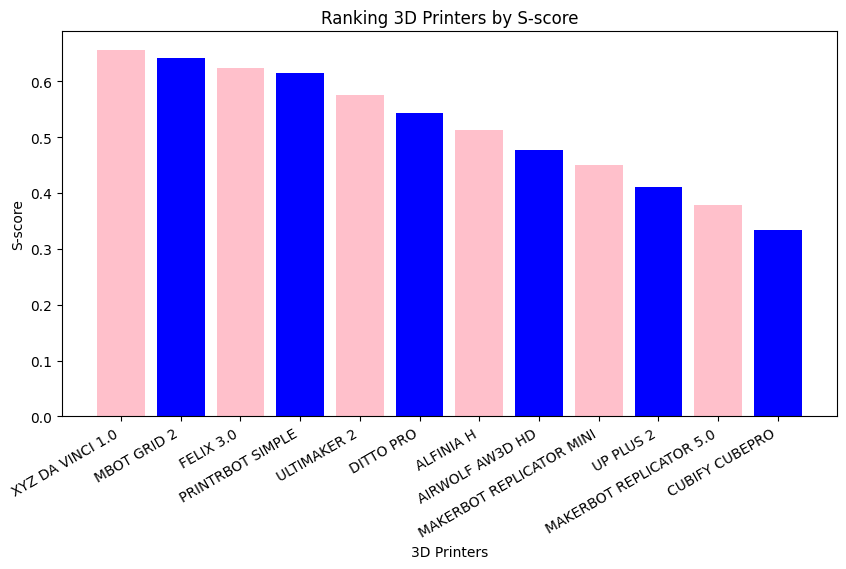

In [440]:
plt.figure(figsize=(10, 5), dpi = 100)
plt.bar(matrix['names'], matrix['s'], color = ['pink', 'blue'])

plt.ylabel("S-score")
plt.xlabel("3D Printers")
plt.title("Ranking 3D Printers by S-score")
plt.xticks(rotation=30, ha='right');